### Identification of New User Groups for Autonomous Vehicles
The objective of this analysis is to identify new user groups that are likely to adopt autonomous vehicles (AVs). To achieve this, data from [the UK National Travel Survey](https://www.gov.uk/government/statistics/national-travel-survey-2019) will be employed, including:
 
- "day_eul_2002-2020.sav": Day-level data file (week of travel)
- "household_eul_2002-2020.sav": Household-level data file
- "individual_eul_2002-2020.sav": Individual-level data file
- "trip_eul_2002-2020.sav": Trip-level data file
 
#### Methodology
The initial step in this analysis will be to select the variables necessary for determining new users in each of the datasets. After cleaning and merging the datasets into a single data file, cluster analysis will be performed to identify user groups. Finally, an estimate of the increase in AV adoption will be made based on the results of the analysis.

#### 1. Data Preprocessing
The initial step is to import the necessary datasets.

In [ ]:
#download data
import gdown

downloads = [{'url': 'https://drive.google.com/uc?id=1cQwNDLCyT7dM2zQJ3ZdOFazfKYqXGWKV', 'output': 'day_eul_2002-2020.sav'},
             {'url': 'https://drive.google.com/uc?id=1E4Xt4uEhNJ5kze3qu1kOALppzPMQdUfy', 'output': 'household_eul_2002-2020.sav'},    
             {'url': 'https://drive.google.com/uc?id=16DGTax803PjxsTOULOfSjIB-bmtXlyPw', 'output': 'individual_eul_2002-2020.sav'},
             {'url': 'https://drive.google.com/uc?id=1m-bxRqTJCzm6W99DShL94c07Mj1jOS7w', 'output': 'trip_eul_2002-2020.sav'}]

for download in downloads:
    url = download['url']
    output = download['output']
    gdown.download(url, output, quiet=False)

In [1]:
# import library
import pyreadstat
import pandas as pd

# Day Level Data File (week of travel) 
df = pd.read_spss('data/day_eul_2002-2020.sav')
# Household Level Data File
df3 = pd.read_spss('data/household_eul_2002-2020.sav')

# Individual Level Data File
df4 = pd.read_spss('data/individual_eul_2002-2020.sav')
# Trip Level Data File 
df7 = pd.read_spss('data/trip_eul_2002-2020.sav') 

The datasets include 18 years of data. To avoid overwhelming the analysis with data, the focus will be on the **2019 survey** wave, which was conducted prior to the COVID-19 pandemic.

In [2]:
# focus on 2019
trip=df7[df7["SurveyYear"]==2019]
ind=df4[df4["SurveyYear"]==2019]
house=df3[df3["SurveyYear"]==2019]
day=df[df["SurveyYear"]==2019]

print("trip", trip.columns)
print("ind", ind.columns)
print("house", house.columns)
print("day", day.columns)


trip Index(['TripID', 'DayID', 'IndividualID', 'HouseholdID', 'PSUID', 'PersNo',
       'TravDay', 'JourSeq', 'HowComp_B01ID', 'SeriesCall_B01ID',
       'ShortWalkTrip_B01ID', 'NumStages', 'NumStages_B01ID', 'MainMode_B03ID',
       'MainMode_B04ID', 'MainMode_B11ID', 'TripPurpFrom_B01ID',
       'TripPurpTo_B01ID', 'TripPurpose_B01ID', 'TripPurpose_B02ID',
       'TripPurpose_B04ID', 'TripStartHours', 'TripStartMinutes', 'TripStart',
       'TripStart_B01ID', 'TripStart_B02ID', 'TripEndHours', 'TripEndMinutes',
       'TripEnd', 'TripEnd_B01ID', 'TripEnd_B02ID', 'TripDisIncSW',
       'TripDisIncSW_B01ID', 'TripDisExSW', 'TripDisExSW_B01ID',
       'TripTotalTime', 'TripTotalTime_B01ID', 'TripTravTime',
       'TripTravTime_B01ID', 'TripOrigGOR_B02ID', 'TripDestGOR_B02ID', 'JJXSC',
       'JOTXSC', 'JTTXSC', 'JD', 'W5', 'W5xHH', 'SurveyYear'],
      dtype='object')
ind Index(['IndividualID', 'HouseholdID', 'PSUID', 'VehicleID', 'PersNo',
       'Interview_B01ID', 'Age_B01ID', 'Age_B0

The following variables will be selected for the analysis to identify new user groups:

- Day data
    - DayID  
    - Travel Weekday
- Household data
    - Household ID
    - Household income (1st, 2nd,......5th)
- Individual data
    - Individual ID
    - Household ID
    - Age
    - Economic Status (Full-time, Part-time, Retired, etc.)
    - Main reason do not drive
- Trip data
    - Trip ID
    - DayID  
    - Individual ID
    - Main mode of travel
    - Trip Purpose
    - Trip start time
    - Trip Distance (miles)
    - Total trip travelling time (minutes)

Note: The ID variables will be utilized only for the purpose of merging the datasets.

In [3]:
# Select variables
day=day[[ 'DayID', 'TravelWeekDay_B01ID']]

house=house[['HouseholdID',"HHIncQDS2019Eng_B01ID" ]]

ind=ind[['IndividualID', 'HouseholdID', 
'Age_B04ID',"EcoStat_B03ID",
 "ReNDNaM_B01ID"]]

trip=trip[['TripID', 'DayID', 'IndividualID',  
'MainMode_B04ID','TripPurpose_B02ID',  'TripStart_B01ID', 
'TripDisExSW','TripTravTime']]

# join data
join_data1=pd.merge(ind, house, on='HouseholdID', how="left")
join_data2=pd.merge(trip, day, on='DayID', how="left")
join_data=pd.merge(join_data2, join_data1, on='IndividualID', how="left")

# remove IDs
join_data=join_data[['MainMode_B04ID',
       'TripPurpose_B02ID', 'TripStart_B01ID',  'TripDisExSW',
       'TripTravTime', 'TravelWeekDay_B01ID',"EcoStat_B03ID",
       'Age_B04ID', 'HHIncQDS2019Eng_B01ID',  'ReNDNaM_B01ID']]
join_data.dtypes

MainMode_B04ID           category
TripPurpose_B02ID        category
TripStart_B01ID          category
TripDisExSW               float64
TripTravTime              float64
TravelWeekDay_B01ID      category
EcoStat_B03ID            category
Age_B04ID                category
HHIncQDS2019Eng_B01ID    category
ReNDNaM_B01ID            category
dtype: object

To conduct meaningful clustering, it is essential to convert the data types to the appropriate format and reclassify the values. The following will outline the process for each variable.

##### Age
As a part of this study, one of the objectives is to identify the group of young people who will utilize autonomous vehicles. However, it is not feasible to assume that individuals under the age of 10 will operate AV independently. Hence, a constraint of **(age>=11)** has been established.

In [4]:
size_mapping = {'60 years +':60,
'50 - 59 years':50, '40 - 49 years':40,'30 - 39 years':30,'21 - 29 years':21,
'17 - 20 years':17,'11 - 16 years':11,'5 - 10 years':5,
'0 - 4 years':0}
join_data["Age_B04ID"] = join_data["Age_B04ID"].map(size_mapping)
join_data["Age_B04ID"] = join_data["Age_B04ID"].astype(float)

# join data
join_data=join_data.query("Age_B04ID>=11")


##### Trip start time
  
Trip start time has been transformed into a numerical value ranging from 0 to 23, representing the hour of the day.

In [5]:
join_data["TripStart_B01ID"]=join_data["TripStart_B01ID"].dropna()
join_data=join_data.query('~(TripStart_B01ID==["NA"])')

size_mapping = {'1500 - 1559':15,
'0800 - 0859':8, '1600 - 1659':16,'1100 - 1159':11,'1700 - 1759':17,'1000 - 1059':10,'1200 - 1259':12,
'1400 - 1459':14,
'1300 - 1359':13, '0900 - 0959':9,'1800 - 1859':18,'1700 - 1759':17,'0700 - 0759':7,'1900 - 1959':19,
'2000 - 2059':20,
'0600 - 0659':6, '2100 - 2159':21,'2200 - 2259':22,'0500 - 0559':5,'2300 - 2359':23,'0400 - 0459':4,
'0000 - 0059':0, '0300 - 0359':3,'0100 - 0159':1,'0200 - 0259':2}
join_data["TripStart_B01ID"] = join_data["TripStart_B01ID"].map(size_mapping)

##### Household income

In [6]:
join_data=join_data.query('~(HHIncQDS2019Eng_B01ID==["DNA"])')
join_data["HHIncQDS2019Eng_B01ID"]=join_data["HHIncQDS2019Eng_B01ID"].dropna()
# reclassify the income
size_mapping = {'5th':5,'4th':4,
'3rd':3,'2nd':2,"1st":1
}

join_data["HHIncQDS2019Eng_B01ID"] = join_data["HHIncQDS2019Eng_B01ID"].map(size_mapping)


##### Day of the week

In [7]:
#reclassify the day
#Note: 1:Sun,2:Mon,3:Tues, 4:Wed, 5:Thurs, 6:Fri, 7:Sat(end)
join_data["TravelWeekDay_B01ID"] = join_data["TravelWeekDay_B01ID"].replace({'Sunday':1,
'Monday':2, 'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7})

##### Economic Status

In [8]:
join_data=join_data.query('~(EcoStat_B03ID==["DNA"])')
join_data["EcoStat_B03ID"]=join_data["EcoStat_B03ID"].dropna()


##### Main mode of travel
  
It has been determined that rows related to "Car/van passenger," "Taxi/minicab," "Car/van driver," and "Motorcycle" should be omitted from consideration. The objective of this analysis is to identify the target demographic for autonomous vehicles (AVs) in the future. Therefore, it is assumed that the potential new users of AVs primarily utilize public transportation (bus or train), bicycles, or walking as their mode of transportation. Those who currently use cars or taxis are not considered as potential new users.

In [9]:
join_data=join_data.query('~(MainMode_B04ID==["Car / van passenger"]) and ~(MainMode_B04ID==["Taxi / minicab"]) and ~(MainMode_B04ID==["Car / van driver"])')

##### Main reason do not drive

The following steps will be undertaken:

1. Identification of individuals below the age of 17 who are currently unable to work.

2. Modification of the "Main reason do not drive" variable, replacing it with "too young to drive." This is because the current variable does not include the category of individuals being too young to drive, and these values are recorded as *NA*.

3. Removing rows that contain the responses of "Not interested in driving" and "Family or friends can drive me when necessary." This is due to the belief that these individuals are unlikely to be potential new users.


In [10]:
underage=join_data.query('(Age_B04ID<17) and (ReNDNaM_B01ID==["DNA"])')
underage["ReNDNaM_B01ID"]="too young to drive"

non_driver=join_data.query('~(ReNDNaM_B01ID==["DNA"])')
non_driver=non_driver.query('~(ReNDNaM_B01ID==["NA"])')
non_driver["ReNDNaM_B01ID"]=non_driver["ReNDNaM_B01ID"].dropna()

#combine the data
non_driver=pd.concat([non_driver, underage], axis=0)

#Select reasons
non_driver=non_driver.query('~(ReNDNaM_B01ID==["Not interested in driving"]) and ~(ReNDNaM_B01ID==["Family or friends can drive me when necessary"])')

C:\Users\audub\AppData\Local\Temp\ipykernel_34952\2211094695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underage["ReNDNaM_B01ID"]="too young to drive"


#### 2. Hopkins Statistics
Prior to conducting clustering, it is necessary to determine the suitability of the dataset for clustering purposes.

To assess the clusterability of the dataset, the Hopkins statistic will be employed. This metric tests the spatial randomness of the data and provides an indication of the tendency for clustering or the potential for the data to be effectively grouped into clusters. The Hopkins statistic calculates the probability that a given dataset is generated by a uniform distribution (Alboukadel Kassambara, n.d.).

The following inferences can be drawn based on the data dimension 'd':

If the calculated value is close to 0.5 or lower, it is unlikely that the data exhibits statistically significant clusters, as it is uniformly distributed.

On the other hand, if the value falls within the range of {0.7, ..., 0.99}, it indicates a high potential for clustering and the presence of statistically significant clusters.

In [11]:
import numpy as np
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.neighbors import NearestNeighbors

def hopkins(X):
    # Number of columns in the data
    n_columns = X.shape[1]
    # Number of rows in the data
    n_rows = len(X)
    # Number of samples to use for computation (heuristic from article [1])
    m = int(0.1 * n_rows)
    # Fit the nearest neighbors model to the data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    # Select a random sample of indices from the data
    rand_indices = sample(range(n_rows), m)

    ujd = []
    wjd = []
    for j in range(m):
        # Calculate the distance from a randomly generated point to its nearest neighbor
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), n_columns).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        # Calculate the distance from a randomly selected data point to its nearest neighbor
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_indices[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        H = 0
    return H

# Use a random sample of data for faster computation
test = non_driver.sample(200, random_state=41)
# Reset the indices of the data
test = test.reset_index(drop=True)

# Check if the data can be clustered
num_features = test.select_dtypes(include=[np.number]).columns
hopkins_value = hopkins(test[num_features])

print( "Result: we got", hopkins_value)

Result: we got 0.8856239799494015


### 3. Clustering Analysis
The examination of the dataset reveals that it comprises both numerical and categorical variables. This implies that K-means, a popular clustering technique, cannot be employed as it only operates on numeric data by calculating the distance between variables. Hence, a more suitable alternative is the utilization of Gower distance, which is a well-established method for clustering mixed data. The transformation of the data into a Gower matrix is required for conducting a clustering analysis.

In [12]:
#Convert category to object
non_driver['MainMode_B04ID']=non_driver['MainMode_B04ID'].astype(object)
non_driver['TripPurpose_B02ID']=non_driver['TripPurpose_B02ID'].astype(object)
non_driver['EcoStat_B03ID']=non_driver['EcoStat_B03ID'].astype(object)
non_driver['TravelWeekDay_B01ID']=non_driver['TravelWeekDay_B01ID'].astype(object)
non_driver['ReNDNaM_B01ID']=non_driver['ReNDNaM_B01ID'].astype(object)

#create gower matrix
import gower

distance_matrix = gower.gower_matrix(non_driver)
distance_matrix

array([[0.        , 0.32600957, 0.2255701 , ..., 0.52763146, 0.534867  ,
        0.5334358 ],
       [0.32600957, 0.        , 0.5086471 , ..., 0.4181766 , 0.3106463 ,
        0.31207743],
       [0.2255701 , 0.5086471 , 0.        , ..., 0.47692078, 0.47668818,
        0.47525707],
       ...,
       [0.52763146, 0.4181766 , 0.47692078, ..., 0.        , 0.20866665,
        0.20723553],
       [0.534867  , 0.3106463 , 0.47668818, ..., 0.20866665, 0.        ,
        0.10143112],
       [0.5334358 , 0.31207743, 0.47525707, ..., 0.20723553, 0.10143112,
        0.        ]], dtype=float32)

Next, it is necessary to determine the optimal number of clusters. To achieve this, a common method such as the "elbow method" can be utilized.

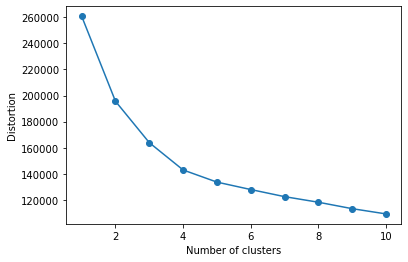

In [13]:
#Visualise elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

distortions = []

for i  in range(1,11):                # Calculating 1 to 10 clusters
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++ method
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(distance_matrix)                         # Clusteing
    distortions.append(km.inertia_)   

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

It tells us that 4 is the optimum number.

In [14]:
from sklearn_extra.cluster import KMedoids

clusters = (KMedoids(n_clusters=4, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=300, 
                           random_state=43)
            .fit(distance_matrix)
            .labels_)

In [15]:
non_driver.size

46040

In [16]:
non_driver.insert(0, "Cluster", clusters, True)
non_driver.Cluster.value_counts()

1    1494
0    1149
2    1097
3     864
Name: Cluster, dtype: int64

In [17]:
#Convert variables into original ones
size_mapping = {0:"Cluster1",
1:"Cluster2", 2:"Cluster3",3:"Cluster4"}
non_driver["Cluster"] = non_driver["Cluster"].map(size_mapping)

non_driver["TravelWeekDay_B01ID"]= non_driver["TravelWeekDay_B01ID"].replace({1:'Sunday',
2:'Monday', 3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'})

size_mapping = {5:'5th',4:'4th',
3:'3rd',2:'2nd',1:"1st"
}

non_driver["HHIncQDS2019Eng_B01ID"] = non_driver["HHIncQDS2019Eng_B01ID"].map(size_mapping)

C1=non_driver.query('Cluster==["Cluster1"]')
C2=non_driver.query('Cluster==["Cluster2"]')
C3=non_driver.query('Cluster==["Cluster3"]')
C4=non_driver.query('Cluster==["Cluster4"]')

In order to gain a better understanding of the clusters, it is worth visualising them.

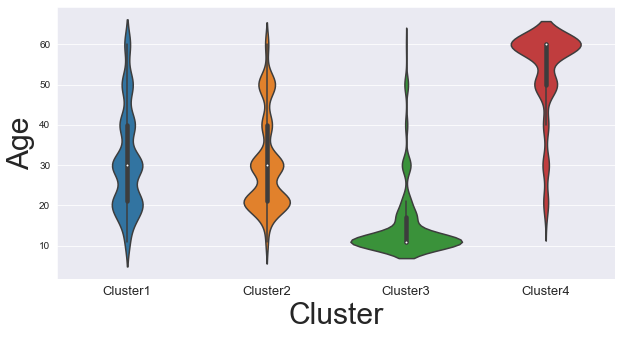

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.violinplot(x = "Cluster",y="Age_B04ID", data = non_driver,order=["Cluster1","Cluster2","Cluster3","Cluster4"])
plt.xlabel( "Cluster", fontsize = 30)
plt.ylabel("Age", fontsize = 30)
plt.xticks(fontsize = 13)
plt.show()

It is apparent that the majority of young individuals belong to Cluster 3, while Cluster 4 is primarily composed of elderly individuals. Further analysis should be conducted to determine the trend of Clusters 1 and 2.

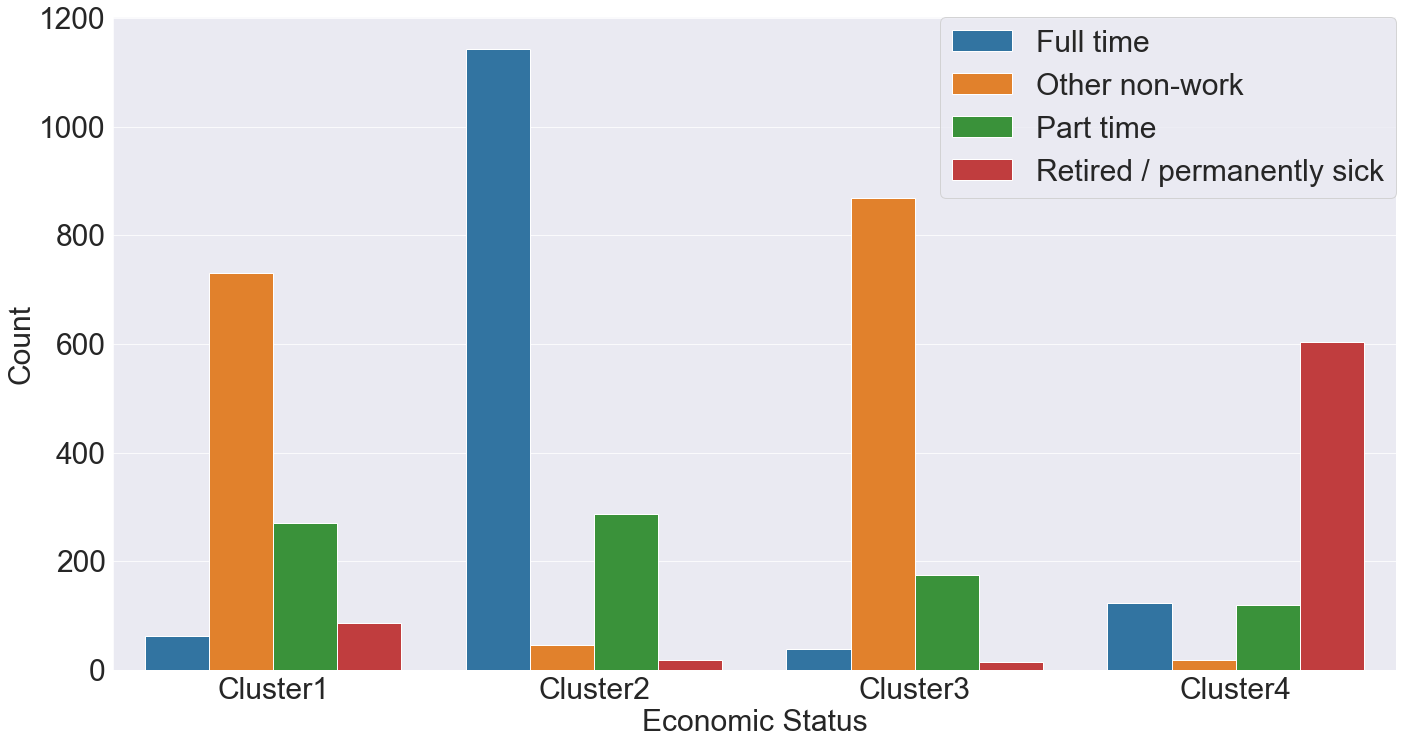

In [19]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "EcoStat_B03ID",order=["Cluster1","Cluster2","Cluster3","Cluster4"],
hue_order=["Full time", "Other non-work", "Part time", "Retired / permanently sick"])
plt.xlabel("Economic Status", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend( loc='upper right', borderaxespad=0.,fontsize = 30)
plt.show()

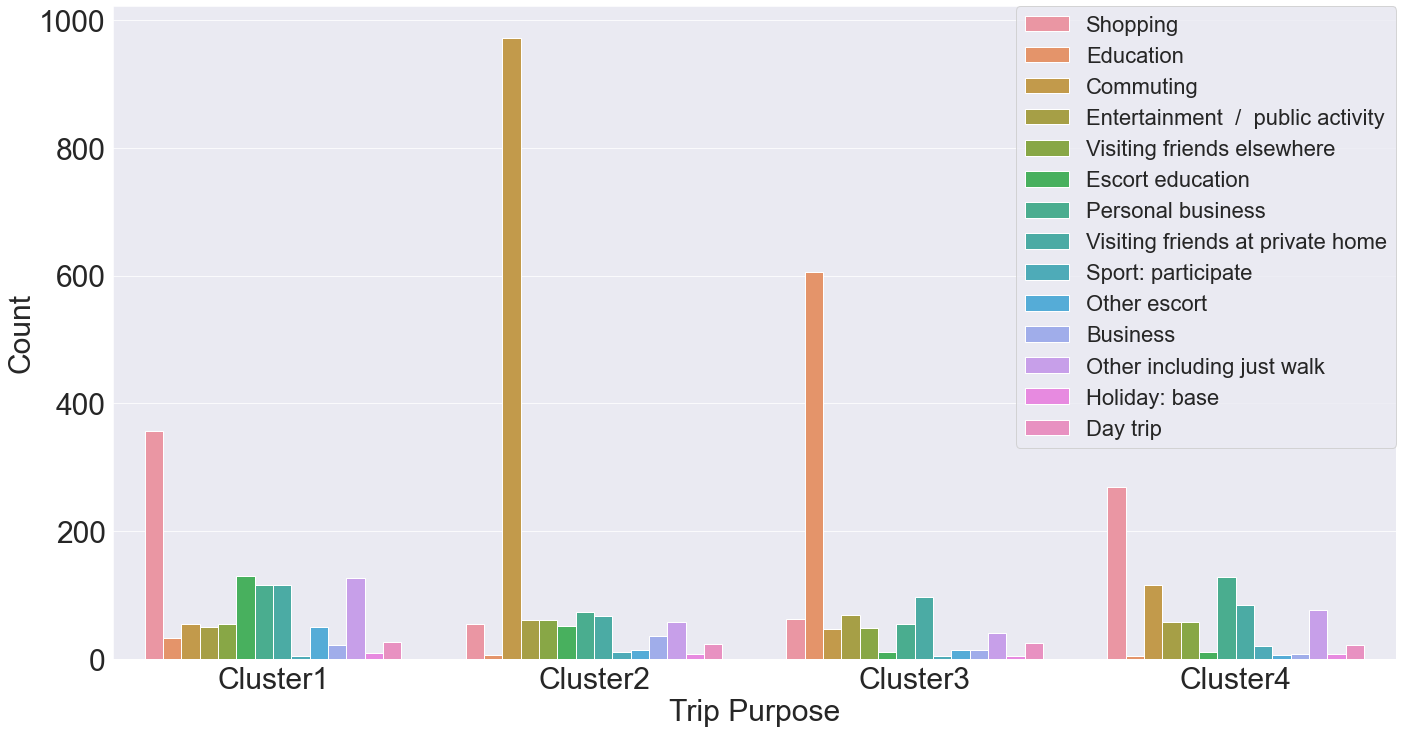

In [20]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "TripPurpose_B02ID",order=["Cluster1","Cluster2","Cluster3","Cluster4"])

plt.xlabel("Trip Purpose", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc='upper right', borderaxespad=0.,fontsize = 22)
plt.show()

As is evident from the visualisation presented above, Cluster 1 encompasses individuals who are not employed full-time, while Cluster 2 comprises commuters. Based on this, the following cluster names will be adopted: non-Commuters, Commuters, Young, and Elderly, for Clusters 1 to 4, respectively.

In [21]:
size_mapping = {"Cluster1":"non-Commuters",
"Cluster2":"Commuters", "Cluster3":"Young", "Cluster4":"Elderly"}
non_driver["Cluster"] = non_driver["Cluster"].map(size_mapping)

In [22]:
non_driver["Cluster"].value_counts()

Commuters        1494
non-Commuters    1149
Young            1097
Elderly           864
Name: Cluster, dtype: int64

Presented below are the remaining visualisations.

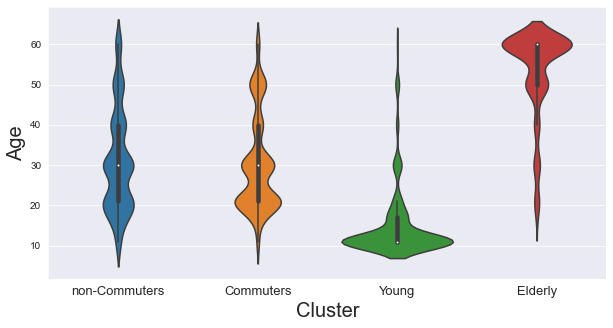

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.violinplot(x = "Cluster",y="Age_B04ID", data = non_driver,order=["non-Commuters","Commuters","Young","Elderly"])
plt.xlabel( "Cluster", fontsize = 20)
plt.ylabel("Age", fontsize = 20)
plt.xticks(fontsize = 13)
plt.show()



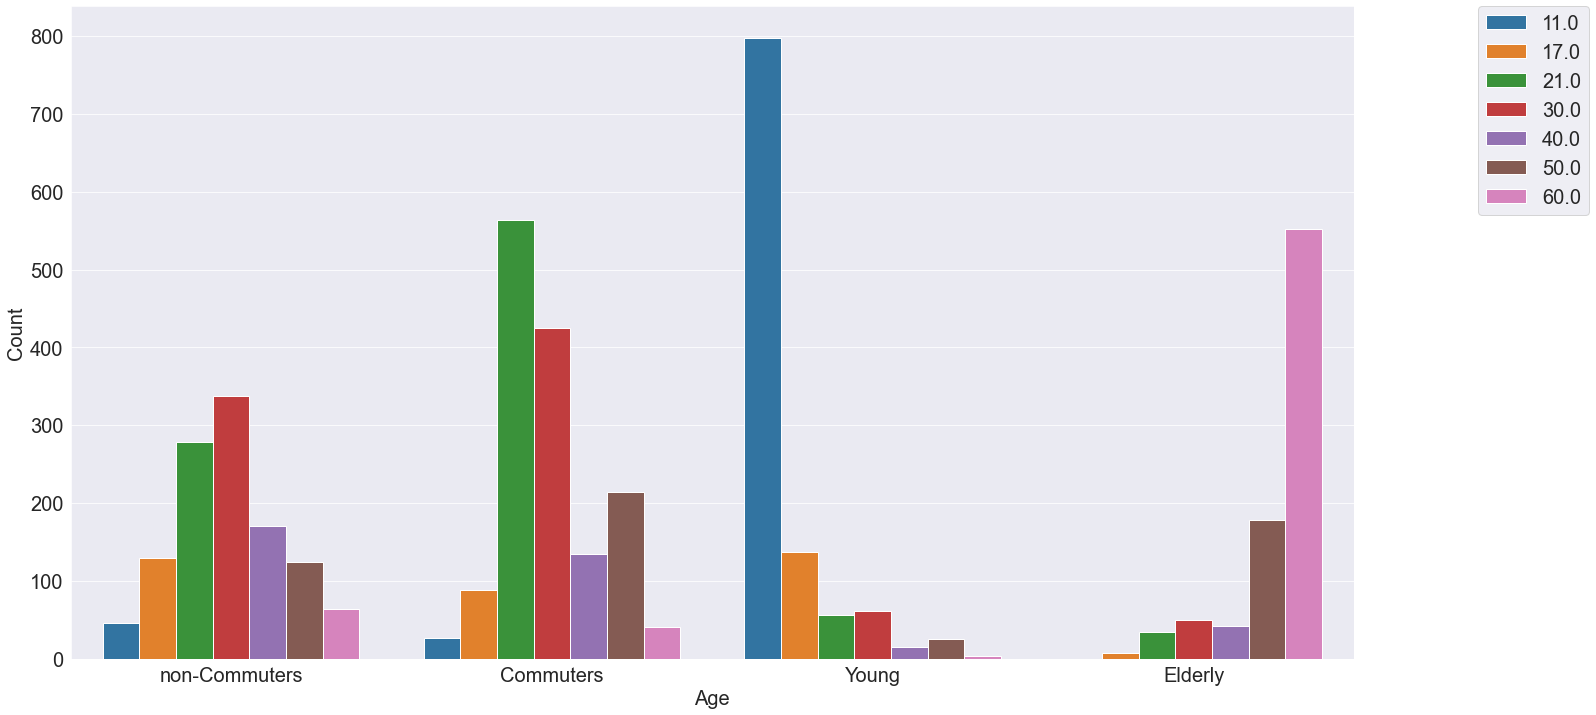

In [24]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "Age_B04ID",order=["non-Commuters","Commuters","Young","Elderly"])
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.14, 1), loc='upper center', borderaxespad=0.,fontsize = 20)
plt.show()

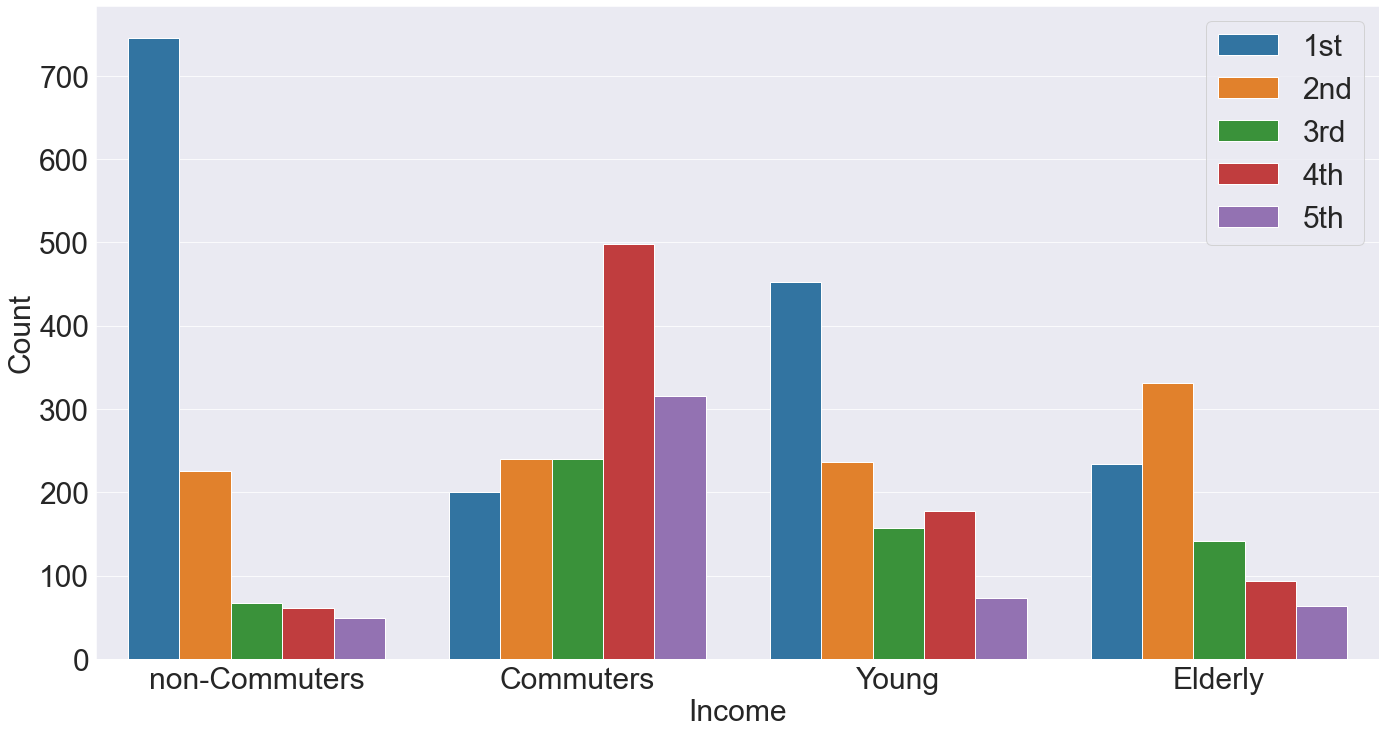

In [25]:

plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "HHIncQDS2019Eng_B01ID",order=["non-Commuters","Commuters","Young","Elderly"],
hue_order=["1st","2nd","3rd","4th","5th"])
plt.xlabel("Income", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc='upper right',fontsize = 30)
plt.show()

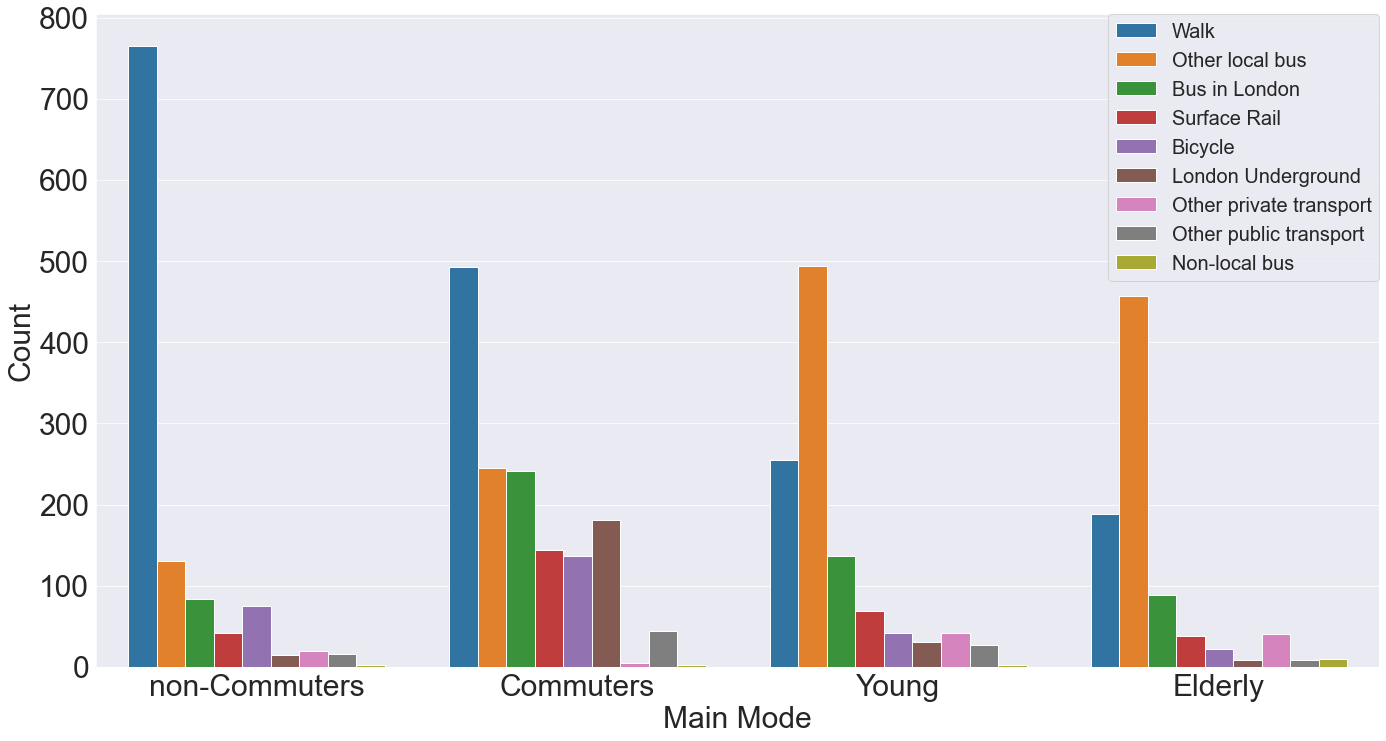

In [26]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "MainMode_B04ID",order=["non-Commuters","Commuters","Young","Elderly"],
hue_order=["Walk","Other local bus","Bus in London","Surface Rail","Bicycle","London Underground","Other private transport","Other public transport","Non-local bus"                
])
plt.xlabel("Main Mode", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend( loc='upper right', borderaxespad=0.,fontsize = 20)
plt.show()

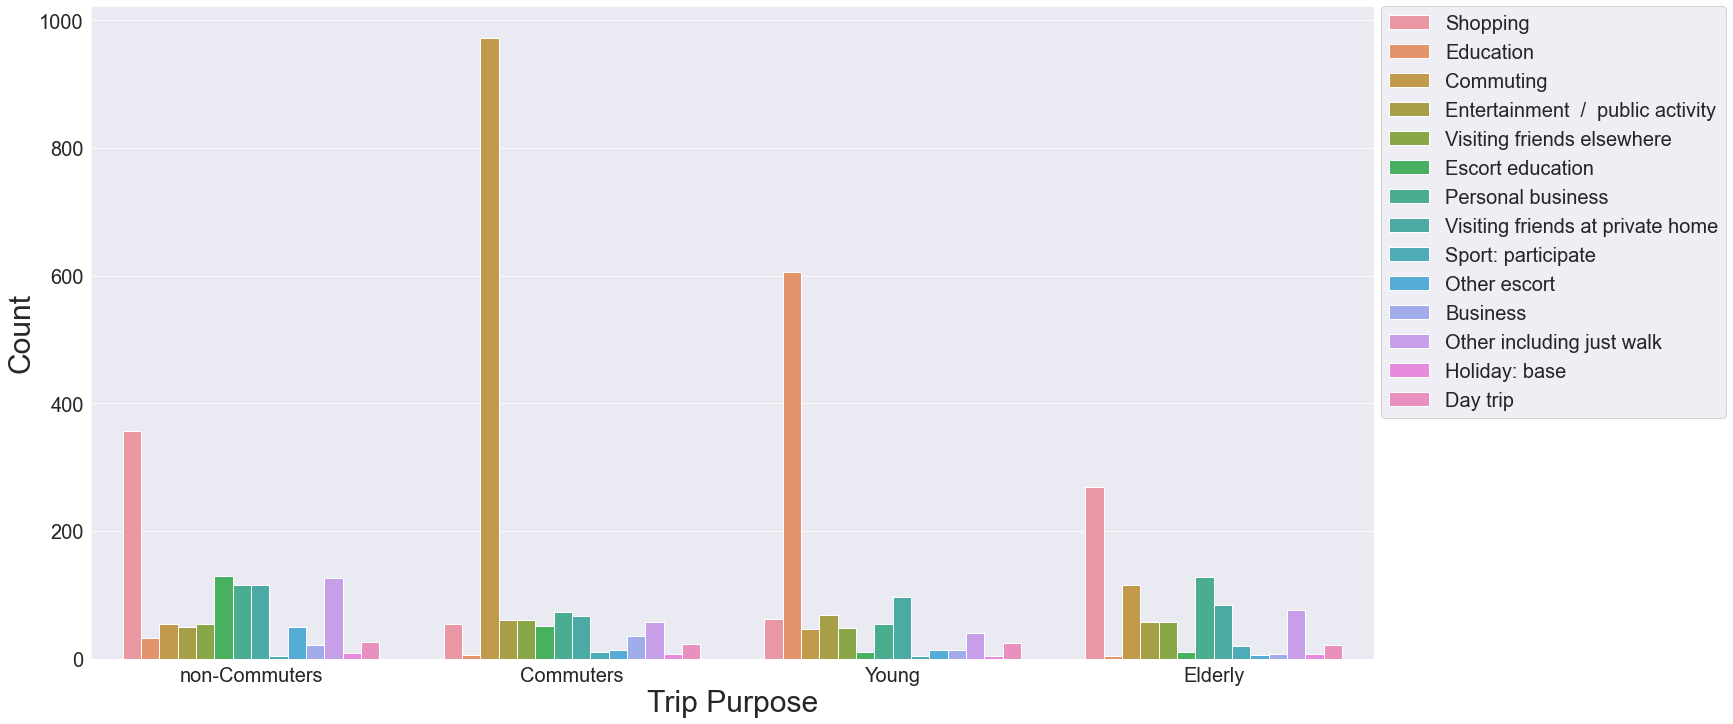

In [27]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "TripPurpose_B02ID",order=["non-Commuters","Commuters","Young","Elderly"])

plt.xlabel("Trip Purpose", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.14, 1), loc='upper center', borderaxespad=0.,fontsize = 20)
plt.show()

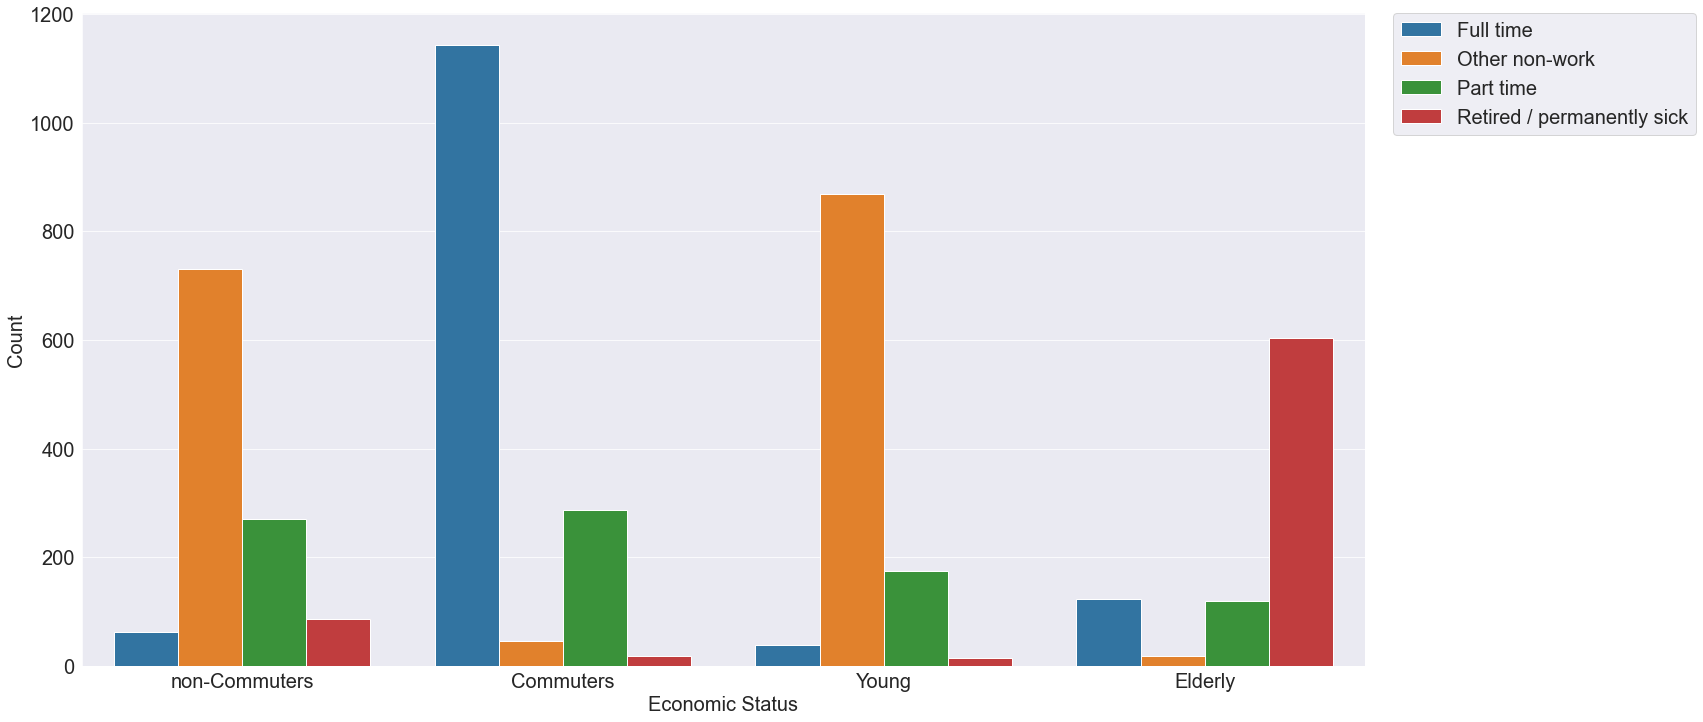

In [28]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "EcoStat_B03ID",order=["non-Commuters","Commuters","Young","Elderly"],
hue_order=["Full time", "Other non-work", "Part time", "Retired / permanently sick"])
plt.xlabel("Economic Status", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.14, 1), loc='upper center', borderaxespad=0.,fontsize = 20)
plt.show()

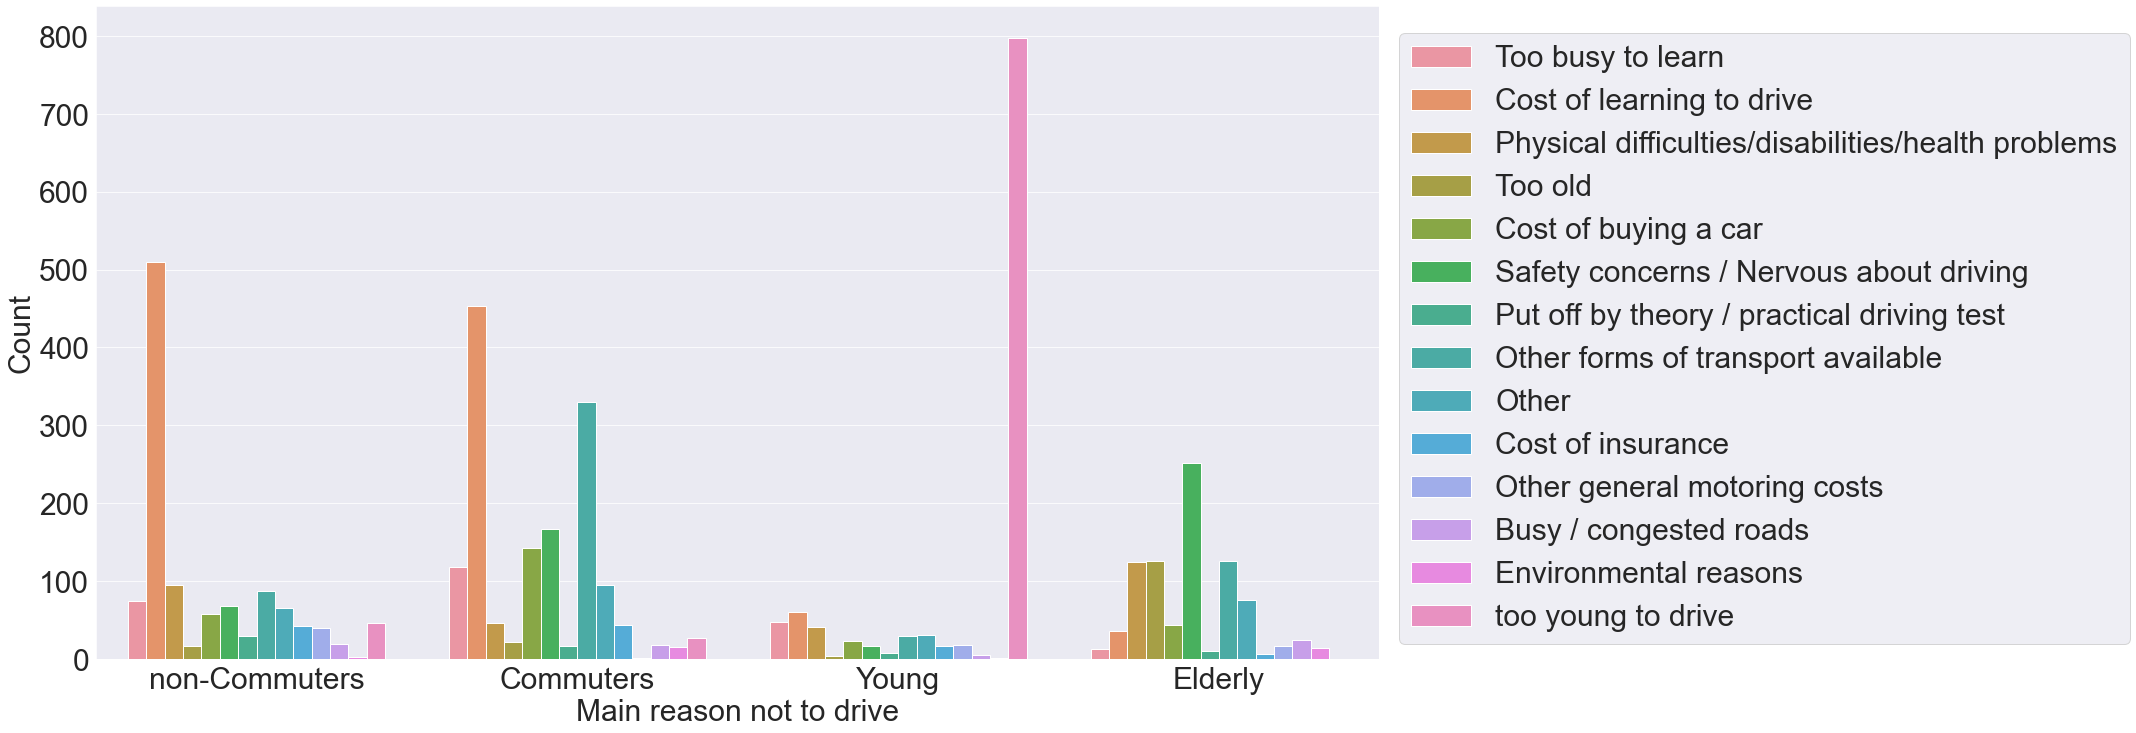

In [29]:
plt.figure(figsize=(23, 12))
sns.set_style('darkgrid')
sns.countplot(x = "Cluster", data = non_driver,  hue = "ReNDNaM_B01ID",order=["non-Commuters","Commuters","Young","Elderly"])
plt.xlabel("Main reason not to drive", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(bbox_to_anchor=(1.30, 0.96), loc='upper center', borderaxespad=0.,fontsize = 30)
plt.show()

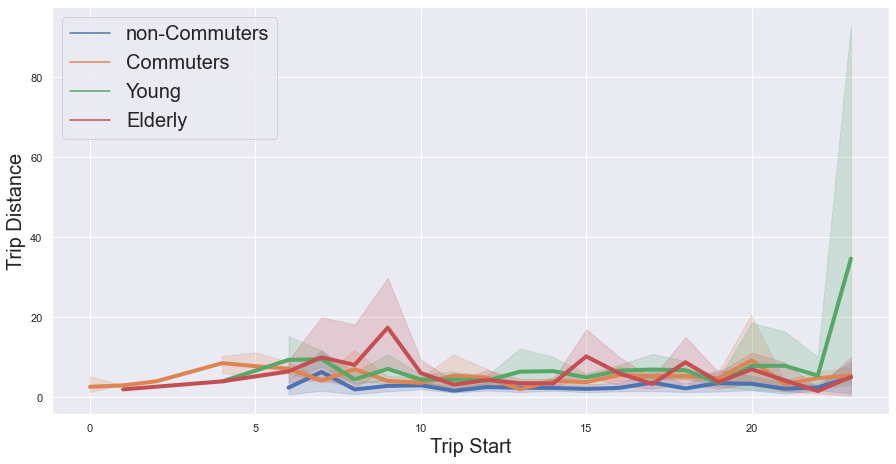

In [30]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(15, 7.5)})

g=sns.lineplot(x = "TripStart_B01ID",y="TripDisExSW",data=non_driver ,linewidth = 4,hue="Cluster",
hue_order=["non-Commuters","Commuters","Young","Elderly"])
g.set_xlabel( "Trip Start", fontsize = 20)
g.set_ylabel("Trip Distance", fontsize = 20)
plt.legend(loc='upper left',fontsize = 20)

plt.show()

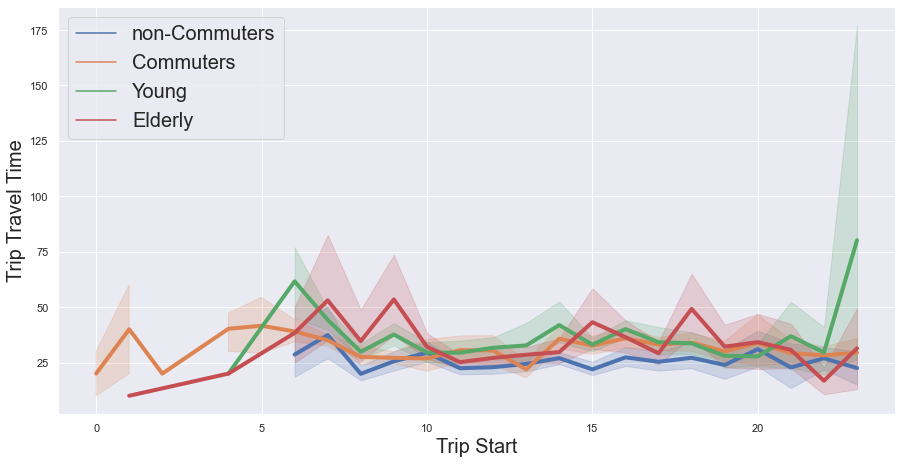

In [31]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(15, 7.5)})

g=sns.lineplot(x = "TripStart_B01ID",y="TripTravTime", data=non_driver,linewidth = 4,hue="Cluster",
hue_order=["non-Commuters","Commuters","Young","Elderly"])
g.set_xlabel( "Trip Start", fontsize = 20)
g.set_ylabel("Trip Travel Time", fontsize = 20)
plt.legend(loc='upper left',fontsize = 20)

plt.show()

### 4. Estimation of the Percentage of New Users

Based on our analysis, it appears that "Young" and "Elderly" clusters may represent distinct user groups. To ascertain their prevalence, we can estimate the percentage of these groups within our sample. 

In [32]:
elderly=non_driver[non_driver["Cluster"]=="Elderly"]
young=non_driver[non_driver["Cluster"]=="Young"]
total=len(join_data)
young=len(young)/total *100
elderly=len(elderly)/total *100
print("The percentage of young new users is", round(young,2),"%")
print("The percentage of elderly new users is", round(elderly,2),"%")

The percentage of young new users is 2.67 %
The percentage of elderly new users is 2.1 %
